In [270]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [271]:
org = pd.read_csv('Historical Product Demand.csv')
df = org.copy()

In [272]:
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [273]:
df.columns = list(map(lambda x: x.lower(),df.columns))

In [274]:
df

,product_code,warehouse,product_category,date,order_demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [275]:
df.rename(columns={
    'product_code':'product',
    'product_category':'category'
},inplace=True)

In [276]:
df

,product,warehouse,category,date,order_demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [277]:
len(df['product'].unique())

2160

In [278]:
df['product'].unique()


array(['Product_0993', 'Product_0979', 'Product_1159', ...,
       'Product_0237', 'Product_0644', 'Product_0853'], dtype=object)

In [279]:
df['product'] = list(map(lambda x: x.replace('Product_',''),df['product']))

In [280]:
df['product'].unique()


array(['0993', '0979', '1159', ..., '0237', '0644', '0853'], dtype=object)

In [281]:
df.warehouse.unique()

array(['Whse_J', 'Whse_S', 'Whse_C', 'Whse_A'], dtype=object)

In [282]:
df['warehouse'] = list(map(lambda x: x.lower(),list(map(lambda x: x.replace('Whse_',''),df['warehouse']))))

In [283]:
df.warehouse.unique()

array(['j', 's', 'c', 'a'], dtype=object)

In [284]:
df

,product,warehouse,category,date,order_demand
0,0993,j,Category_028,2012/7/27,100
1,0979,j,Category_028,2012/1/19,500
2,0979,j,Category_028,2012/2/3,500
3,0979,j,Category_028,2012/2/9,500
4,0979,j,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,1791,j,Category_006,2016/4/27,1000
1048571,1974,j,Category_006,2016/4/27,1
1048572,1787,j,Category_006,2016/4/28,2500
1048573,0901,j,Category_023,2016/10/7,50


In [285]:
df['category'] = list(map(lambda x: x.lower(),list(map(lambda x: x.replace('Category_',''),df['category']))))

In [286]:
len(df['category'].unique())

33

In [287]:
df

,product,warehouse,category,date,order_demand
0,0993,j,028,2012/7/27,100
1,0979,j,028,2012/1/19,500
2,0979,j,028,2012/2/3,500
3,0979,j,028,2012/2/9,500
4,0979,j,028,2012/3/2,500
...,...,...,...,...,...
1048570,1791,j,006,2016/4/27,1000
1048571,1974,j,006,2016/4/27,1
1048572,1787,j,006,2016/4/28,2500
1048573,0901,j,023,2016/10/7,50


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   product       1048575 non-null  object
 1   warehouse     1048575 non-null  object
 2   category      1048575 non-null  object
 3   date          1037336 non-null  object
 4   order_demand  1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [289]:
df.date = pd.to_datetime(df.date)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   product       1048575 non-null  object        
 1   warehouse     1048575 non-null  object        
 2   category      1048575 non-null  object        
 3   date          1037336 non-null  datetime64[ns]
 4   order_demand  1048575 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 40.0+ MB


In [291]:
df.order_demand.unique()

array(['100 ', '500 ', '50000 ', ..., '(3750)', '(191)', '28250 '],
      dtype=object)

In [292]:
t = [y for y in enumerate(df.order_demand) if '(' in y[1]]

In [293]:
idx = list(map(lambda x: x[0],t))
idx

[112290,
 112307,
 112308,
 112356,
 112357,
 112360,
 112378,
 112441,
 112563,
 112610,
 112673,
 112679,
 112696,
 112697,
 112719,
 112857,
 112926,
 112927,
 113062,
 113095,
 113096,
 113097,
 113098,
 113127,
 113130,
 113132,
 113137,
 113141,
 113174,
 113175,
 113236,
 113237,
 113245,
 113295,
 113489,
 113831,
 114721,
 114764,
 114816,
 114834,
 115607,
 115741,
 115750,
 115761,
 115763,
 115768,
 115780,
 115787,
 115836,
 115853,
 115860,
 115861,
 115864,
 115865,
 115866,
 115955,
 116042,
 116335,
 116451,
 116452,
 116453,
 116454,
 116479,
 116480,
 116493,
 116494,
 116495,
 116496,
 116504,
 116505,
 116518,
 116519,
 116529,
 116530,
 116531,
 116539,
 116541,
 116549,
 116550,
 116576,
 116577,
 116694,
 116718,
 116908,
 116909,
 116914,
 116921,
 116933,
 117034,
 117070,
 117123,
 117130,
 117134,
 117139,
 117158,
 117159,
 117169,
 117175,
 117176,
 117177,
 117192,
 117196,
 117197,
 117198,
 117207,
 117211,
 117212,
 117213,
 117223,
 117224,
 117225,
 

In [294]:
df.iloc[idx,:]

,product,warehouse,category,date,order_demand
112290,2169,a,024,2012-08-09,(1)
112307,2132,a,009,2012-11-01,(24)
112308,2144,a,009,2012-11-01,(24)
112356,2118,a,009,2012-03-07,(50)
112357,2120,a,009,2012-03-07,(100)
...,...,...,...,...,...
1047812,1887,j,007,2016-06-30,(100)
1047840,0092,j,019,2016-06-15,(400)
1047855,0686,j,011,2016-07-29,(230)
1047856,0687,j,011,2016-07-29,(230)


In [295]:
df.order_demand = list(map(lambda x: x.replace(')',''),list(map(lambda x: x.replace('(',''),df.order_demand))))

In [296]:
df.iloc[idx,:]

,product,warehouse,category,date,order_demand
112290,2169,a,024,2012-08-09,1
112307,2132,a,009,2012-11-01,24
112308,2144,a,009,2012-11-01,24
112356,2118,a,009,2012-03-07,50
112357,2120,a,009,2012-03-07,100
...,...,...,...,...,...
1047812,1887,j,007,2016-06-30,100
1047840,0092,j,019,2016-06-15,400
1047855,0686,j,011,2016-07-29,230
1047856,0687,j,011,2016-07-29,230


In [297]:
df.order_demand = pd.to_numeric(df.order_demand)

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   product       1048575 non-null  object        
 1   warehouse     1048575 non-null  object        
 2   category      1048575 non-null  object        
 3   date          1037336 non-null  datetime64[ns]
 4   order_demand  1048575 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 40.0+ MB


In [299]:
df_cat = df.groupby(by='category',axis=0).count()['product']
df_cat

category
001     97787
002        77
003      4189
004       329
005    101671
006     35577
007     82402
008      1560
009     19738
010       976
011     23208
012      1147
013      3743
014        26
015     22954
016        37
017       615
018      5239
019    481099
020      3490
021     52011
022      8657
023      7899
024     20885
025        35
026     14803
027        26
028     31302
029       671
030     12997
031      2280
032      9296
033      1849
Name: product, dtype: int64

In [300]:
#set([len(df[df['product'] == x]['category'].unique()) for x in df['product'].unique()])

In [301]:
df.groupby(by='product',axis=0).count()['order_demand'].sort_values(ascending=False).head(30)

product
1359    16936
1295    10575
1378     9770
0620     9428
1286     8888
1382     8619
1453     8503
1294     8384
1377     7872
1287     7829
1274     7048
1016     6571
1248     6348
0613     6079
1241     5476
1456     5442
1470     5159
0031     5035
1410     4995
0608     4803
1360     4801
1451     4703
1250     4655
1381     4583
1264     4523
0033     4479
1262     4478
1452     4462
1023     4381
1463     4331
Name: order_demand, dtype: int64

In [302]:
test = df[df['product'] == '1452'][['date','order_demand']].set_index('date') # Teste sera feito com a amostra de um produto qualquer
test = test.sort_index()
test

,order_demand
date,
2012-01-05,300
2012-01-05,10000
2012-01-05,5000
2012-01-05,5000
2012-01-06,100
...,...
2016-12-27,1000
2016-12-27,2000
2016-12-27,1000


In [303]:
test.shape

(4462, 1)

<AxesSubplot:xlabel='date'>

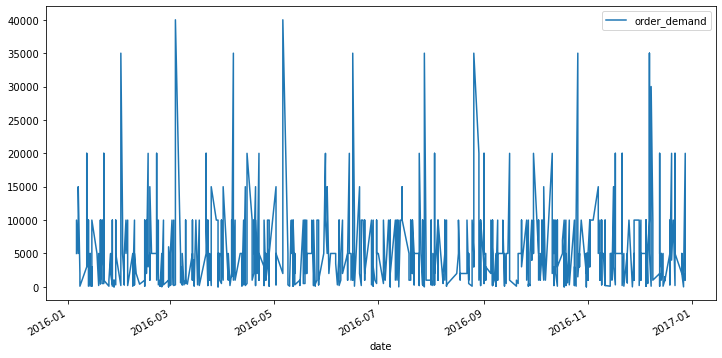

In [304]:
test[test.index.year==2016].plot(kind='line',figsize=(12,6))

<AxesSubplot:xlabel='date'>

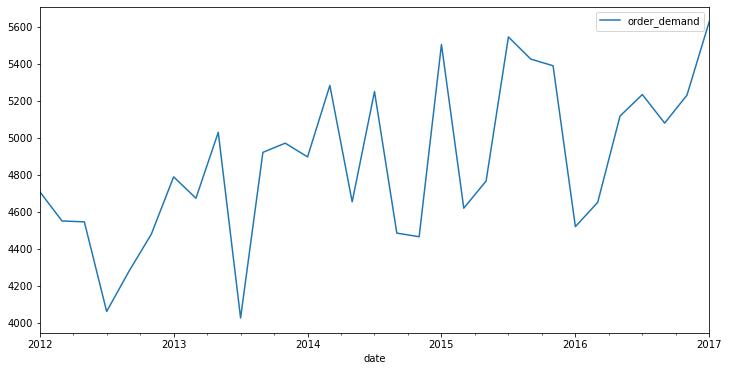

In [305]:
bim = test.resample('2M').mean()
bim.plot(figsize=(12,6))

<AxesSubplot:xlabel='date'>

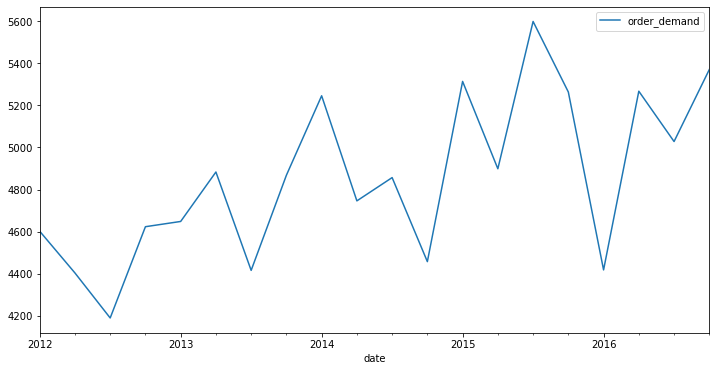

In [306]:
tri = test.resample('Q').mean()
tri.plot(figsize=(12,6))

<AxesSubplot:xlabel='date'>

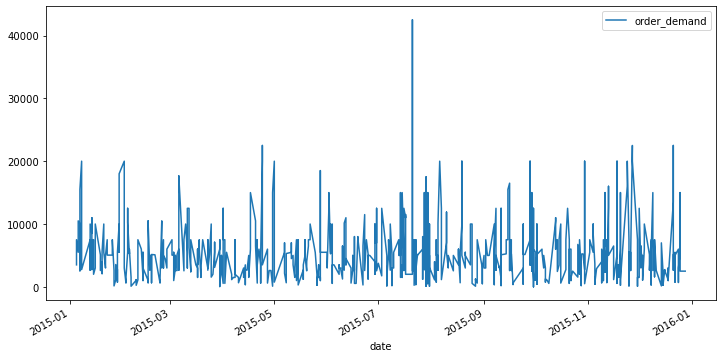

In [307]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=2)
rol_mean = test.rolling(window=indexer,
                        min_periods=2
                        ).mean()

rol_mean = rol_mean.shift(2)
rol_mean[rol_mean.index.year==2015].plot(figsize=(12,6))

<AxesSubplot:xlabel='date'>

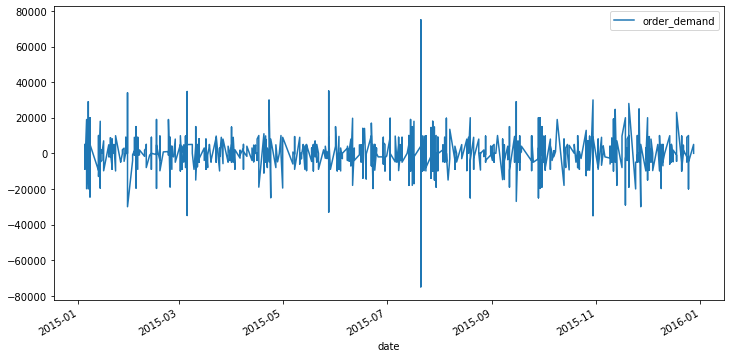

In [308]:
test[test.index.year==2015].diff().plot(figsize=(12,6))

In [309]:
test = test.resample('M').sum()

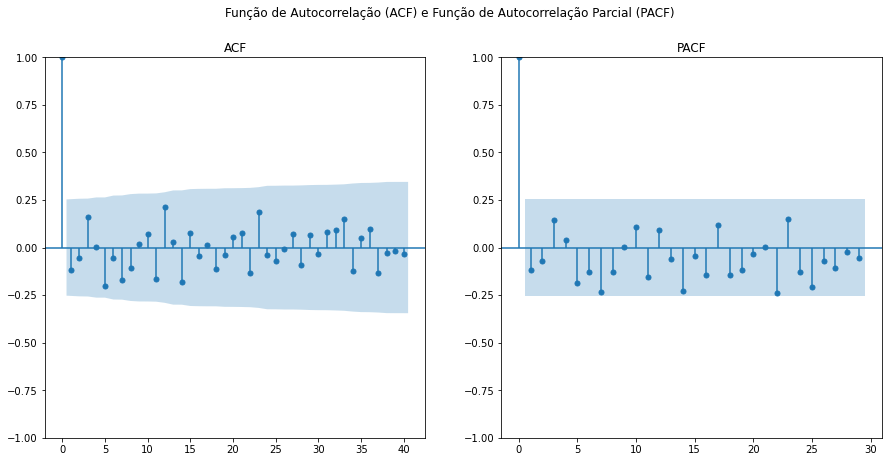

In [310]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

dados = test

fig, ax = plt.subplots(1, 2,figsize=(15,7))
fig.suptitle('Função de Autocorrelação (ACF) e Função de Autocorrelação Parcial (PACF)')


plot_acf(dados, lags=40, ax=ax[0])
ax[0].set_title('ACF')

plot_pacf(dados, lags=29, ax=ax[1])
ax[1].set_title('PACF')

plt.show()

In [311]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(endog=test,
            freq='M',
            order=(5,1,1)).fit()

#print((mod.resid ** 2).mean())
#mod.summary()

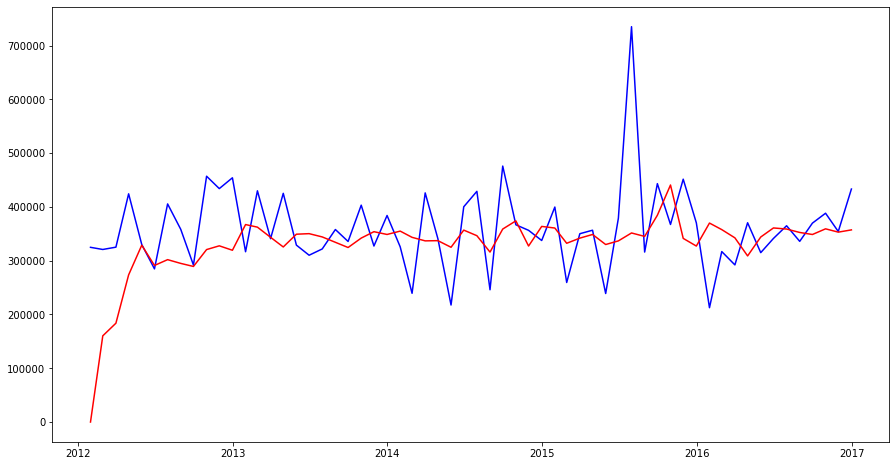

In [312]:
plt.figure(figsize=(15,8))
plt.plot(test, color='blue')
plt.plot(mod.predict(typ='levels'),color='red')

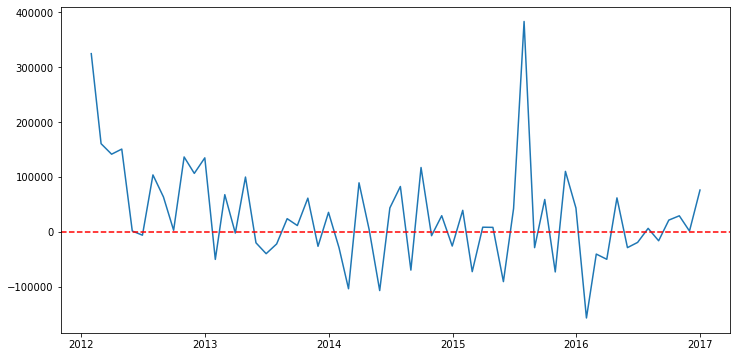

In [313]:
dif = test['order_demand']-mod.predict(typ='levels')
plt.figure(figsize=(12,6))
plt.plot(dif)
plt.axhline(y=0,color='red',linestyle='--');

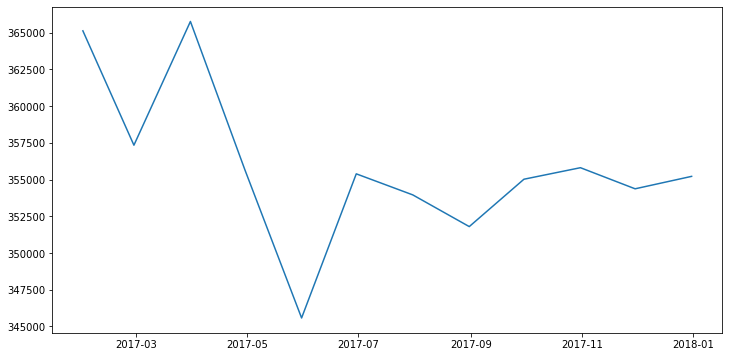

In [320]:
import matplotlib.pyplot as plt

forecast = mod.forecast(12)
plt.figure(figsize=(12, 6))
plt.plot(forecast)
